#      <center>        Multi Class Credit Score Classification - Kaggle Challenge </center>
# <center> Team - Oh FML </center>
### <center>   Irene SUNNY | Ru Yi | Shuqi DENG | Wenjing Zhao  </center>

In [3]:
import numpy as np
import pandas as pd

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy import stats
import joblib

## Reading and Familiarising the Dataset

In [ ]:
train_data = pd.read_csv('train_set.csv', index_col=0)
test_data = pd.read_csv('test_set.csv', index_col=0)

In [ ]:
# Quick overview of the data
print("Training Set Overview:")
print(train_data.head())

print("\nTest Set Overview:")
print(test_data.head())

# First column is index column

Training Set Overview:
        Customer_ID  Month           Name   Age          SSN    Occupation  \
ID                                                                           
84094         23943      5       Leonoray  18.0   84355102.0    Journalist   
46702         29066      5         Osamua  21.0  981149909.0       Teacher   
147514         8183      5           Benf  47.0  324295086.0     Developer   
16675         27938      2  Matt Falloonm  41.0  564682345.0  Entrepreneur   
84080         38740      3   Seetharamank  53.0  228116416.0       Manager   

        Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
ID                                                                
84094        70260.20            5564.016667                9.0   
46702        18001.59            1258.132500                7.0   
147514        9824.31             707.692500                7.0   
16675        87481.62            7022.135000                0.0   
84080       129204.92       

In [ ]:
# Confirming if Month and  Customer ID is the unique rwo identifier
unique_identifier_check = train_data.groupby(['Month', 'Customer_ID']).size().reset_index(name='Count')

# Display rows where Count is greater than 1, indicating non-unique combinations
non_unique_identifiers = unique_identifier_check[unique_identifier_check['Count'] > 1]

if non_unique_identifiers.empty:
    print("The combination of Month and Customer ID is unique in train data.")
else:
    print("There are non-unique combinations of Month and Customer ID in train data:")
    print(non_unique_identifiers)

# Confirming if Month and  Customer ID is the unique rwo identifier
unique_identifier_check = test_data.groupby(['Month', 'Customer_ID']).size().reset_index(name='Count')

# Display rows where Count is greater than 1, indicating non-unique combinations
non_unique_identifiers = unique_identifier_check[unique_identifier_check['Count'] > 1]

if non_unique_identifiers.empty:
    print("The combination of Month and Customer ID is unique test data.")
else:
    print("There are non-unique combinations of Month and CustomerID test data:")
    print(non_unique_identifiers)

The combination of Month and Customer ID is unique in train data.
The combination of Month and Customer ID is unique test data.


In [ ]:
unique_customer_ids = len(train_data['Customer_ID'].unique())
print("Number of unique Customer_ID Train :", unique_customer_ids)

unique_customer_ids = len(test_data['Customer_ID'].unique())
print("Number of unique Customer_ID Test:", unique_customer_ids)

Number of unique Customer_ID Train : 12498
Number of unique Customer_ID Test: 11783


In [ ]:
# Display basic information about the datasets
print(train_data.info())
print(test_data.info())

# COMMENT : No null values for any columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 84094 to 29219
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               70000 non-null  int64  
 1   Month                     70000 non-null  int64  
 2   Name                      70000 non-null  object 
 3   Age                       70000 non-null  float64
 4   SSN                       70000 non-null  float64
 5   Occupation                70000 non-null  object 
 6   Annual_Income             70000 non-null  float64
 7   Monthly_Inhand_Salary     70000 non-null  float64
 8   Num_Bank_Accounts         70000 non-null  float64
 9   Num_Credit_Card           70000 non-null  float64
 10  Interest_Rate             70000 non-null  float64
 11  Num_of_Loan               70000 non-null  float64
 12  Type_of_Loan              70000 non-null  object 
 13  Delay_from_due_date       70000 non-null  float64
 14  Nu

## Exploratory Data Analysis (EDA)

### Summary Statistics

In [ ]:
# Get the summary statistics of the numerical features in the train set.
train_data_summary = train_data.describe().T

# Round the results to 3 decimal places.
train_data_summary = train_data_summary.round(3)

print(train_data_summary)

# Get the summary statistics of the numerical features in the test set.
test_data_summary = test_data.describe().T

# Round the results to 3 decimal places.
test_data_summary = test_data_summary.round(3)

print(test_data_summary)

                            count          mean           std        min  \
Customer_ID               70000.0  2.595064e+04  1.435034e+04   1006.000   
Month                     70000.0  4.497000e+00  2.286000e+00      1.000   
Age                       70000.0  3.328000e+01  1.077400e+01     14.000   
SSN                       70000.0  5.003604e+08  2.911527e+08  81349.000   
Annual_Income             70000.0  5.048016e+04  3.837556e+04   7005.930   
Monthly_Inhand_Salary     70000.0  4.195831e+03  3.192775e+03    303.645   
Num_Bank_Accounts         70000.0  5.370000e+00  2.595000e+00      0.000   
Num_Credit_Card           70000.0  5.537000e+00  2.067000e+00      0.000   
Interest_Rate             70000.0  1.455200e+01  8.749000e+00      1.000   
Num_of_Loan               70000.0  3.532000e+00  2.447000e+00      0.000   
Delay_from_due_date       70000.0  2.106000e+01  1.481500e+01      0.000   
Num_of_Delayed_Payment    70000.0  1.330100e+01  6.230000e+00      0.000   
Changed_Cred

### Box Plot

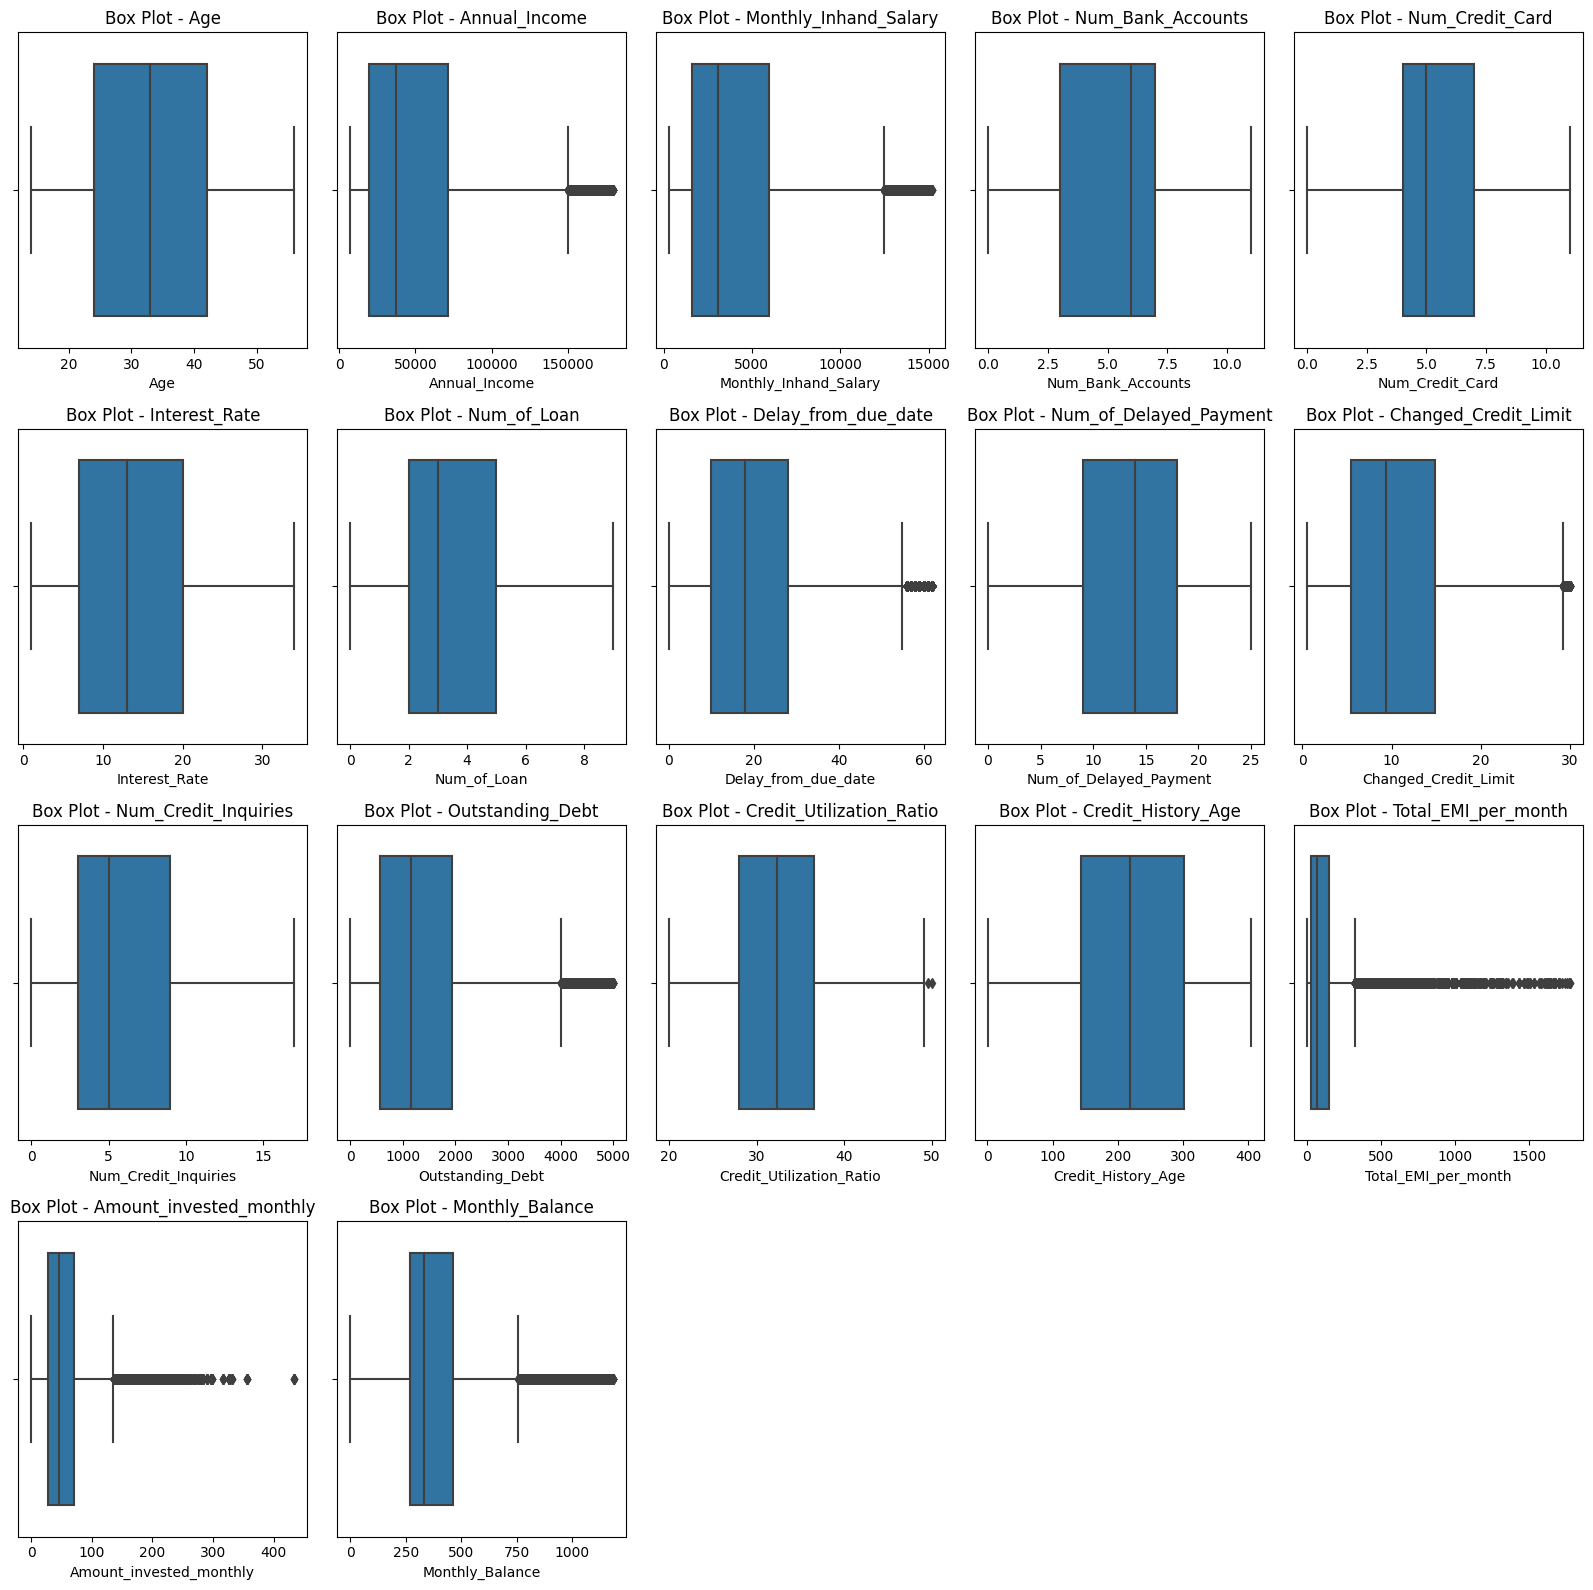

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
                     'Num_of_Loan', 'Delay_from_due_date','Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                     'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
                     'Amount_invested_monthly', 'Monthly_Balance']

# Determine the number of subplots and rows dynamically
num_subplots = len(numerical_columns)
num_rows = (num_subplots + 4) // 5  # Calculate the number of rows needed

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(16, 4 * num_rows))

# Plot box plots for each numerical feature
for i, column in enumerate(numerical_columns):
    row_idx, col_idx = divmod(i, 5)
    sns.boxplot(x=train_data[column], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Box Plot - {column}')

# Remove empty subplots
for i in range(num_subplots, num_rows * 5):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.show()


### Distribution of Columns

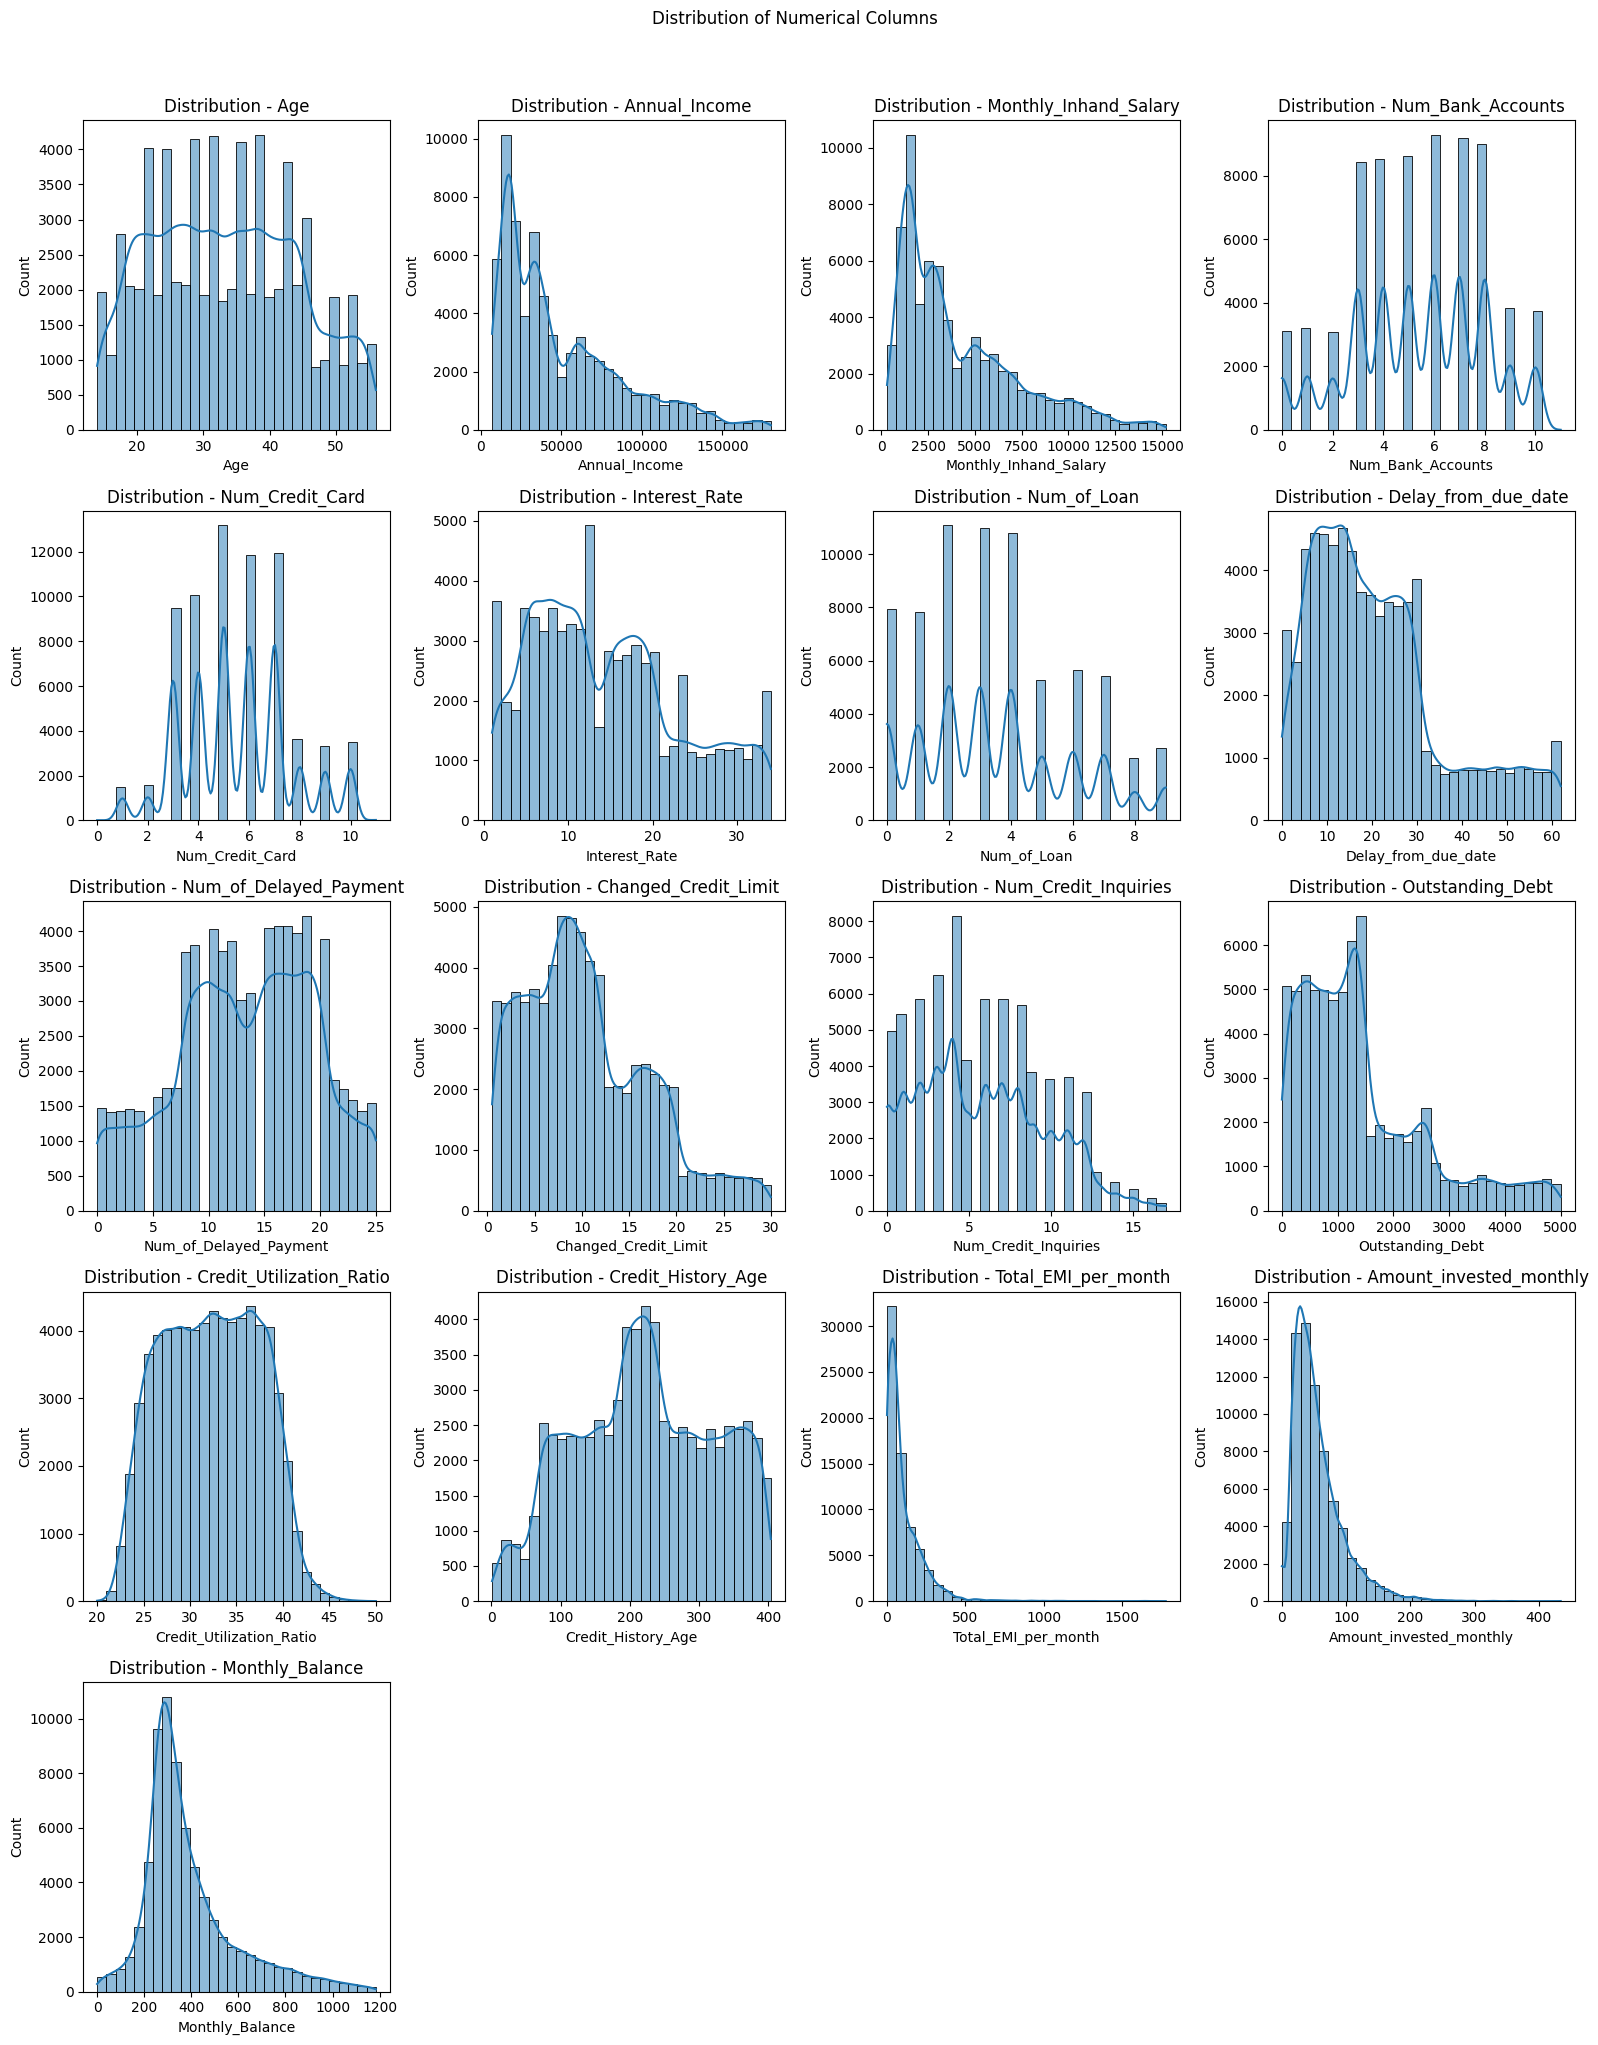

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
                     'Num_of_Loan', 'Delay_from_due_date','Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                     'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
                     'Amount_invested_monthly', 'Monthly_Balance']

# Determine the number of subplots and rows dynamically
num_subplots = len(numerical_columns)
num_rows = (num_subplots + 3) // 4  # Calculate the number of rows needed

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 4 * num_rows))
fig.suptitle('Distribution of Numerical Columns', y=1.02)

# Plot histograms for each numerical feature
for i, column in enumerate(numerical_columns):
    row_idx, col_idx = divmod(i, 4)
    sns.histplot(train_data[column], kde=True, ax=axes[row_idx, col_idx], bins=30)
    axes[row_idx, col_idx].set_title(f'Distribution - {column}')

# Remove empty subplots
for i in range(num_subplots, num_rows * 4):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.show()

### Encoding Credit Score and assigning it as target variable

In [ ]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(train_data['Credit_Score']).astype(int)
Y

array([1, 1, 0, ..., 2, 2, 1])

### Correlation Matrix

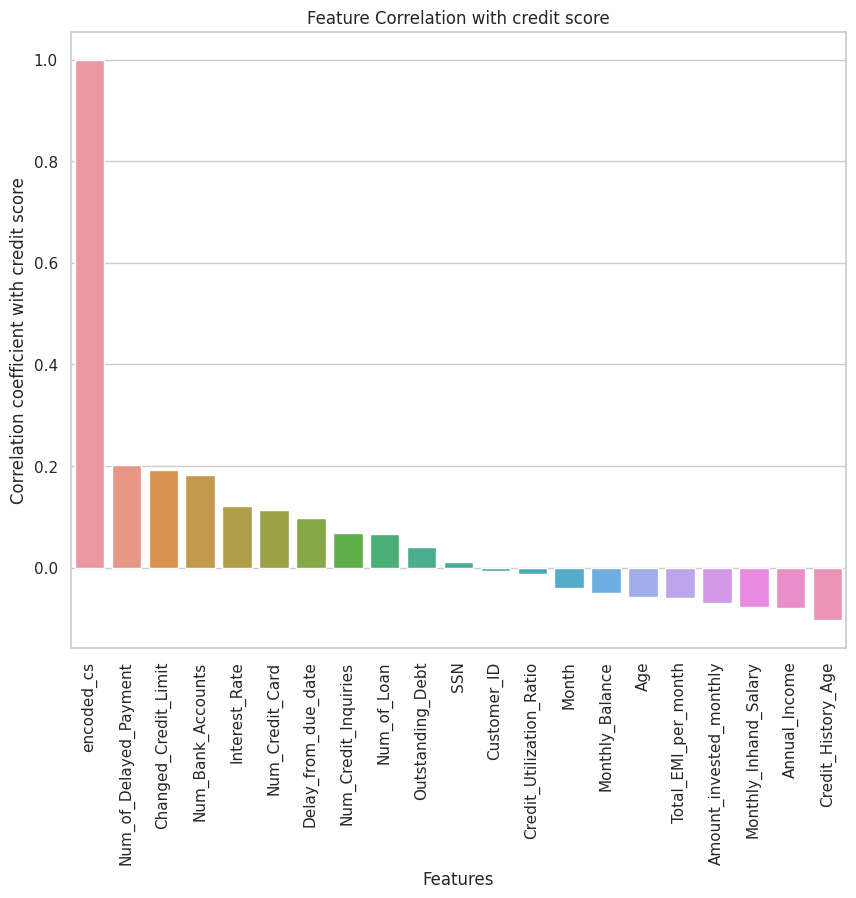

In [ ]:
# Select only numerical columns for correlation analysis
numerical_cols = train_data.select_dtypes(include=[np.number])

correlation_matrix = numerical_cols.corr()

# Use 'encoded_cs' as the target variable
correlation_with_target = correlation_matrix['encoded_cs'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

# Create a bar plot
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)

plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation coefficient with credit score')
plt.title('Feature Correlation with credit score')

# Show the plot
plt.show()

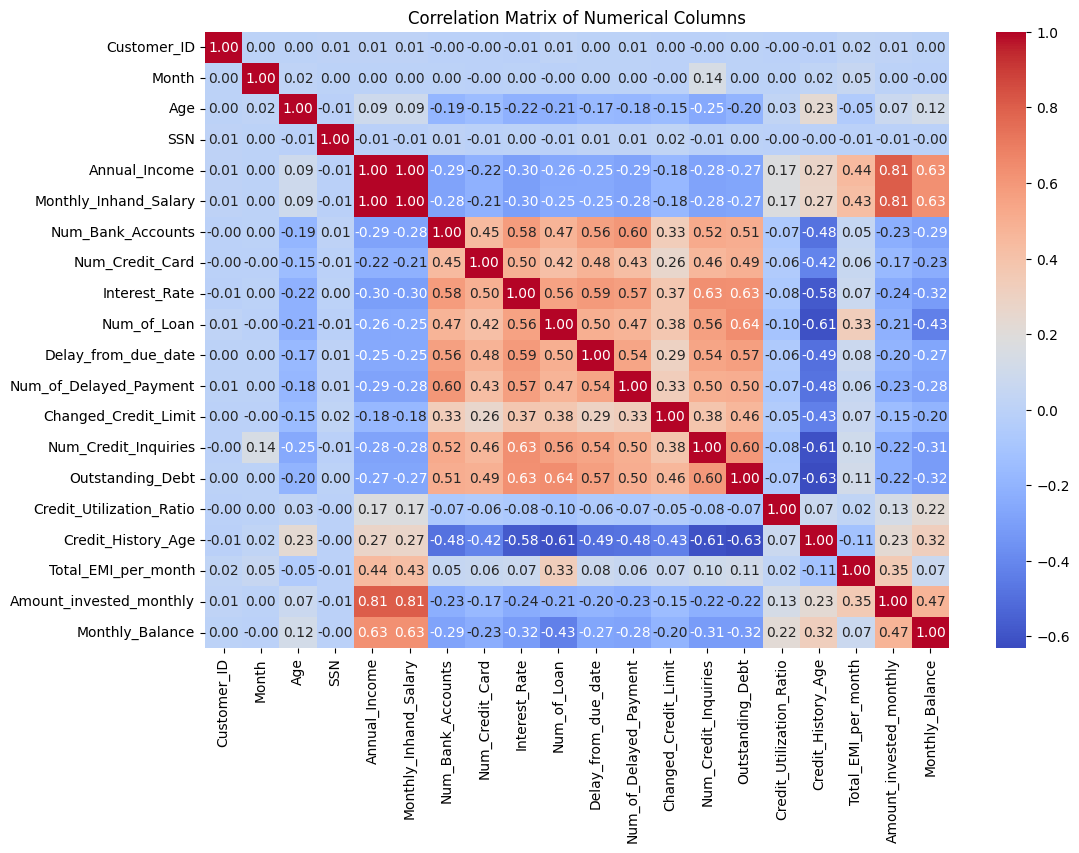

In [ ]:
## To see exact values of correlation

# # Select only numerical columns for the correlation matrix
# numerical_train_data = train_data.select_dtypes(include=[np.number])

# # Compute the correlation matrix
# corr_matrix = numerical_train_data.corr()

# # Plot the heatmap for the correlation matrix
# plt.figure(figsize=(12, 8))  # Optional: Adjust figure size
# sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
# plt.title('Correlation Matrix of Numerical Columns')
# plt.show()

# STAGE 1 - Testing 6 Models and Selecting The Best

## Data Pre Processing / Feature Engineering

### Treatment of 'Type of Loan' Label Encoding

In [ ]:
# First, let's handle the 'Type_of_Loan' column and create dummy variables
loan_type_dummies = train_data['Type_of_Loan'].str.get_dummies(sep=',')

# Now, we'll determine the rare loan types based on a 5% threshold
threshold = 0.05 * len(train_data)
rare_loans = loan_type_dummies.sum()[loan_type_dummies.sum() < threshold].index.tolist()

# We'll also consider 'not specified' as a rare type
rare_loans.append('not specified')

# Create a new 'Other' column for rare loan types
loan_type_dummies['Other'] = loan_type_dummies[rare_loans].sum(axis=1).clip(upper=1)

# Drop the individual columns for rare loan types
loan_type_dummies = loan_type_dummies.drop(columns=rare_loans)

# Add 'Type_of_Loan' as a prefix to the dummy variable headers
loan_type_dummies = loan_type_dummies.add_prefix('Type_of_Loan_')

# The 'loan_type_dummies' DataFrame now contains the processed dummy variables for 'Type_of_Loan'

print(len(loan_type_dummies.columns))
print(loan_type_dummies.head())

10
        Type_of_Loan_No Data  Type_of_Loan_auto loan  \
ID                                                     
84094                      0                       0   
46702                      0                       0   
147514                     1                       0   
16675                      0                       0   
84080                      0                       1   

        Type_of_Loan_credit-builder loan  \
ID                                         
84094                                  0   
46702                                  1   
147514                                 0   
16675                                  1   
84080                                  1   

        Type_of_Loan_debt consolidation loan  Type_of_Loan_home equity loan  \
ID                                                                            
84094                                      0                              1   
46702                                      0              

### Device a pipeline for encoding the categorical features and standardizing the numerical ones

In [ ]:

# Dropping unwanted columns for independent variables list

#X = train_data.drop(['Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan', 'Credit_Score'], axis=1)
#X = X.drop(['encoded_cs'], axis=1)

# #Add loan_type_dummies to X
# X = pd.concat([X, loan_type_dummies], axis=1)

#Retrieving columns which are categorical and numerical
def categorical(df):
  return df.select_dtypes(include=['object', 'category']).columns.tolist()

categorical_columns=categorical(X)
print("Categorical columns are :",categorical_columns, "\n")

def numerical(df):
  return df.select_dtypes(include=['int','float']).columns.tolist()
numerical_columns=numerical(X)
print("Numerical columns are :", numerical_columns, "\n")

# Print the number of features before the length
print("Number of features:", len(X.columns))

if len(categorical_columns) + len(numerical_columns) == len(X.columns):
    print("All columns are covered")
else:
    print("One or more columns are left out")##


Categorical columns are : ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'] 

Numerical columns are : ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Type_of_Loan_No Data', 'Type_of_Loan_auto loan', 'Type_of_Loan_credit-builder loan', 'Type_of_Loan_debt consolidation loan', 'Type_of_Loan_home equity loan', 'Type_of_Loan_mortgage loan', 'Type_of_Loan_payday loan', 'Type_of_Loan_personal loan', 'Type_of_Loan_student loan', 'Type_of_Loan_Other'] 

Number of features: 31
All columns are covered


In [ ]:
# Preprocessing pipelines for both numerical and categorical data
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numerical_transformer, numerical_columns)
    ])

# Applying the preprocessor to the dataset
X_processed = preprocessor.fit_transform(X)

# Creating a DataFrame from the processed features
categorical_column_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=categorical_columns)
X_df = pd.DataFrame(X_processed, columns=list(categorical_column_names) + numerical_columns)

# Reset the index of Y to align with X_df if needed and create a DataFrame
# Y_df = pd.DataFrame(Y.reset_index(drop=True), columns=['Credit_Score_Encoded'])
Y_df = pd.DataFrame({'Credit_Score_Encoded': Y})

# Quality Check
print("Number of rows:",len(X_df))
print("List of Features:", X_df.columns.tolist())
print(X_df.head())

print("Number of rows:", len(Y_df))
print("Target Variable:", Y_df.columns.tolist())
print(Y_df.head())

Number of rows: 70000
List of Features: ['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager', 'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good', 'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM', 'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes', 'Payment_Behaviour_High_spent_Large_value_payments', 'Payment_Behaviour_High_spent_Medium_value_payments', 'Payment_Behaviour_High_spent_Small_value_payments', 'Payment_Behaviour_Low_spent_Large_value_payments', 'Payment_Behaviour_Low_spent_Medium_value_payments', 'Payment_Behaviour_Low_spent_Small_value_payments', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 

## Random Forest For Feature Selection

In [ ]:
'''
Train a Random Forest model on the data and then analyze the feature importances provided by the model.
This will help to determine which features are most predictive of the target variable.
'''
## Train a Random Forest Model

# Instantiate the model
# Note: Willadjust n_estimators and other hyperparameters as needed
rf = RandomForestClassifier(n_estimators=300, random_state=42)

# Fit the model to the data
rf.fit(X_df, Y_df.values.ravel())

##Retrieve and Analyze Feature Importances
# Get feature importances
importances = rf.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({'feature': X_df.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances)

##Select Top Features
# Example: Select the top N features
N = 20  # Adjust N based on your needs
top_features_RF = feature_importances['feature'].head(N).tolist()
print ("Top 20 Features Selected through RF are: ", top_features_RF)

# Select these top features from X_df
X_selected_RF = X_df[top_features_RF]

                                              feature  importance
38                                   Outstanding_Debt    0.088905
32                                      Interest_Rate    0.067365
40                                 Credit_History_Age    0.065168
34                                Delay_from_due_date    0.053574
36                               Changed_Credit_Limit    0.050146
43                                    Monthly_Balance    0.049457
39                           Credit_Utilization_Ratio    0.047646
17                                Credit_Mix_Standard    0.041369
16                                    Credit_Mix_Good    0.040696
37                               Num_Credit_Inquiries    0.036454
31                                    Num_Credit_Card    0.036367
35                             Num_of_Delayed_Payment    0.035259
41                                Total_EMI_per_month    0.035006
28                                      Annual_Income    0.033471
29        

## XGBooster For Feature Selection

In [ ]:
# Instantiate the XGBoost model
# Note: You can adjust hyperparameters like 'max_depth', 'eta', etc., as needed
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model to the data
xgb_model.fit(X_df, Y_df.values.ravel())

# Retrieve and Analyze Feature Importances
importances_xgb = xgb_model.feature_importances_

# Convert the importances into a DataFrame
feature_importances_xgb = pd.DataFrame({'feature': X_df.columns, 'importance': importances_xgb})

# Sort the DataFrame by importance
feature_importances_xgb = feature_importances_xgb.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_xgb)

# Example: Select the top N features
N = 20  # Adjust N based on your needs
top_features_xgb = feature_importances_xgb['feature'].head(N).tolist()
print("Top 20 Features Selected through XGB are:", top_features_xgb)

# Optionally, select these top features from X_df for modeling
X_selected_xgb = X_df[top_features_xgb]

                                              feature  importance
17                                Credit_Mix_Standard    0.370666
16                                    Credit_Mix_Good    0.296433
15                                     Credit_Mix_Bad    0.075921
38                                   Outstanding_Debt    0.029455
32                                      Interest_Rate    0.014584
31                                    Num_Credit_Card    0.013516
34                                Delay_from_due_date    0.008241
36                               Changed_Credit_Limit    0.007149
30                                  Num_Bank_Accounts    0.006487
19                           Payment_of_Min_Amount_No    0.005942
41                                Total_EMI_per_month    0.005661
26   Payment_Behaviour_Low_spent_Small_value_payments    0.005464
29                              Monthly_Inhand_Salary    0.005199
33                                        Num_of_Loan    0.005197
37        

## Testing For Multicollinearity Between Features Selected Using VIF Score

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Calculate VIF for each set of features
vif_rf = calculate_vif(X_selected_RF)
vif_xgb = calculate_vif(X_selected_xgb)

# Display VIF values
print("\nVIF for Random Forest features:")
print(vif_rf)

print("VIF for XGBoost features:")
print(vif_xgb)

'''
 We will retain all the features that have a VIF score below 5 as it is, the rest needs to be dealt with in both sets.
 VIF for XGBoost features:
 '''


VIF for Random Forest features:
                     Feature         VIF
0           Outstanding_Debt    3.205722
1              Interest_Rate    2.642781
2         Credit_History_Age    2.196120
3        Delay_from_due_date    2.128334
4       Changed_Credit_Limit    1.455205
5            Monthly_Balance    1.967372
6   Credit_Utilization_Ratio    1.054925
7        Credit_Mix_Standard    1.241548
8            Credit_Mix_Good    3.118534
9       Num_Credit_Inquiries    2.219480
10           Num_Credit_Card    1.550618
11    Num_of_Delayed_Payment    2.398312
12       Total_EMI_per_month    1.937335
13             Annual_Income  318.645202
14     Monthly_Inhand_Salary  310.232015
15   Amount_invested_monthly    2.895557
16                       Age    1.088586
17         Num_Bank_Accounts    2.224455
18               Num_of_Loan    2.797297
19            Credit_Mix_Bad    3.951734
VIF for XGBoost features:
                                             Feature         VIF
0              

'\n We will retain all the features that have a VIF score below 5 as it is, the rest needs to be dealt with in both sets.\n VIF for XGBoost features:\n '

In [ ]:
'''
Testing for Correlation between Annual_Income and Monthly_Inhand_Salary due to high VIF Score
'''
correlation_monthly_annual_income = X_selected_RF[["Annual_Income", "Monthly_Inhand_Salary"]].corr()

# Display the correlation matrix
print(correlation_monthly_annual_income)

                       Annual_Income  Monthly_Inhand_Salary
Annual_Income               1.000000               0.998171
Monthly_Inhand_Salary       0.998171               1.000000


In [ ]:
'''
VIF for Random Forest features:- Dropping Annual Income due to high correlation between them.
Dropping one feature is straightforward and easy to implement. Conducting PCA might compromise interpretability.
'''
#update top features by removing annual income
top_features_RF.remove("Annual_Income")

# Now, top_features_RF does not contain "Annual_Income"
print(top_features_RF)

# Drop the "Annual_Income" feature from the RF DataFrame due to high VIF Score and correlation with Monthly_Inhand_Salary
X_selected_RF.drop("Annual_Income", axis=1, inplace=True)

# Display the updated DataFrame
print(X_selected_RF.head())

['Outstanding_Debt', 'Interest_Rate', 'Credit_History_Age', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Monthly_Balance', 'Credit_Utilization_Ratio', 'Credit_Mix_Standard', 'Credit_Mix_Good', 'Num_Credit_Inquiries', 'Num_Credit_Card', 'Num_of_Delayed_Payment', 'Total_EMI_per_month', 'Monthly_Inhand_Salary', 'Amount_invested_monthly', 'Age', 'Num_Bank_Accounts', 'Num_of_Loan', 'Credit_Mix_Bad']
   Outstanding_Debt  Interest_Rate  Credit_History_Age  Delay_from_due_date  \
0          0.694123       0.622628           -0.040394             2.628378   
1          0.691345       1.879879            0.190702            -0.071538   
2         -0.166701       0.279742            0.060083             0.198453   
3         -1.048898      -1.320396            0.612704            -0.476526   
4         -0.303929      -0.291736            0.683037            -0.881513   

   Changed_Credit_Limit  Monthly_Balance  Credit_Utilization_Ratio  \
0             -0.078677        -1.551664              

<ipython-input-23-7a925d76f78d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_RF.drop("Annual_Income", axis=1, inplace=True)


In [ ]:
'''
VIF for XGB features:- "Credit_Mix_Good" and "Credit_Mix_Bad" have a VIF closer to 5, so we test for correlation between them
'''
# Check the correlation between "Credit_Mix_Good" and "Credit_Mix_Bad"
correlation_credit_mix = X_selected_xgb[["Credit_Mix_Good", "Credit_Mix_Bad"]].corr()

# Display the correlation matrix
print(correlation_credit_mix)

'''
VIF for XGB features:-  since there is no strong correlation, we will retain both
'''

                 Credit_Mix_Good  Credit_Mix_Bad
Credit_Mix_Good         1.000000       -0.368945
Credit_Mix_Bad         -0.368945        1.000000


In [ ]:
'''
We will drop Annual_Income from XGB Features due to very high correlation with Monthly_Inhand_Salary

'''
#update top features by removing annual income
top_features_xgb.remove("Annual_Income")

# Now, top_features_XGB does not contain "Annual_Income"
print(top_features_xgb)

# Drop the "Annual_Income" feature from the XGB DataFrame due to high VIF Score and correlation with Monthly_Inhand_Salary
X_selected_xgb.drop("Annual_Income", axis=1, inplace=True)

# Display the updated DataFrame
print(X_selected_xgb.head())

['Credit_Mix_Standard', 'Credit_Mix_Good', 'Credit_Mix_Bad', 'Outstanding_Debt', 'Interest_Rate', 'Num_Credit_Card', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts', 'Payment_of_Min_Amount_No', 'Total_EMI_per_month', 'Payment_Behaviour_Low_spent_Small_value_payments', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Num_of_Delayed_Payment', 'Type_of_Loan_personal loan', 'Type_of_Loan_home equity loan']
   Credit_Mix_Standard  Credit_Mix_Good  Credit_Mix_Bad  Outstanding_Debt  \
0                  0.0              0.0             1.0          0.694123   
1                  0.0              0.0             1.0          0.691345   
2                  1.0              0.0             0.0         -0.166701   
3                  0.0              1.0             0.0         -1.048898   
4                  1.0              0.0             0.0         -0.303929   

   Interest_Rate  Num_Credit_Card  Delay_from_due_date  Changed_Credi

<ipython-input-25-5876212cd6dc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_xgb.drop("Annual_Income", axis=1, inplace=True)


## Spliting Train Data For Training and Validation for Differeant Feature Sets

### Using StratifiedShuffleSplit as it takes class imbalances into account.

### RF Features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
# Specify the percentage of data for the test/validation set (e.g., test_size=0.2 for an 80-20 split)
split=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=121)

for train_index,test_index in split.split(X_selected_RF,Y_df):
  X_rf_train,X_rf_test=X_selected_RF.iloc[train_index],X_selected_RF.iloc[test_index]
  Y_rf_train,Y_rf_test=Y_df.iloc[train_index],Y_df.iloc[test_index]

### XGB Features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
# Specify the percentage of data for the test/validation set (e.g., test_size=0.2 for an 80-20 split)
split=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=121)

for train_index,test_index in split.split(X_selected_xgb,Y_df):
  X_xgb_train,X_xgb_test=X_selected_xgb.iloc[train_index],X_selected_xgb.iloc[test_index]
  Y_xgb_train,Y_xgb_test=Y_df.iloc[train_index],Y_df.iloc[test_index]

### All Features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
# Specify the percentage of data for the test/validation set (e.g., test_size=0.2 for an 80-20 split)
split=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=121)

for train_index,test_index in split.split(X_df,Y_df):
  X_df_train,X_df_test=X_df.iloc[train_index],X_df.iloc[test_index]
  Y_df_train,Y_df_test=Y_df.iloc[train_index],Y_df.iloc[test_index]

# Modeling
### The five machine learning methods we evaluated to begin with are are Random Forest, XGBoost, Decision Tree, KNN and Light GBM. The choice of these models provides a good balance between different types of algorithms, including ensemble methods, tree-based models, instance-based methods, and gradient boosting frameworks.

In [ ]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Method to evaluate the performance of the model
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nEvaluation for {model_name}:")
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Greens', fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()


## Using RF Features


Evaluation for Random Forest:
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      3756
           1       0.78      0.82      0.80      6120
           2       0.82      0.80      0.81     11124

    accuracy                           0.80     21000
   macro avg       0.79      0.79      0.79     21000
weighted avg       0.80      0.80      0.80     21000


---------------------------------------------



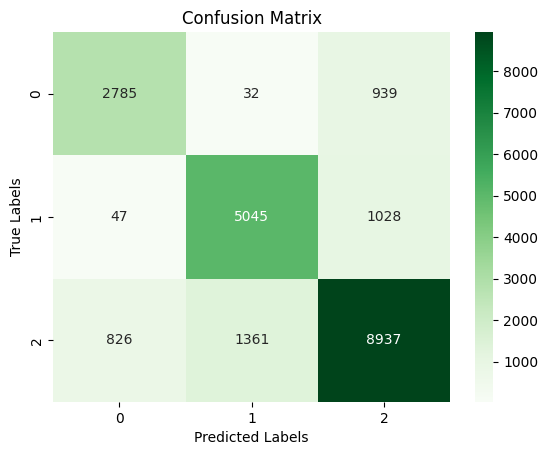


Evaluation for XGBoost:
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      3756
           1       0.77      0.76      0.76      6120
           2       0.79      0.79      0.79     11124

    accuracy                           0.77     21000
   macro avg       0.76      0.76      0.76     21000
weighted avg       0.77      0.77      0.77     21000


---------------------------------------------



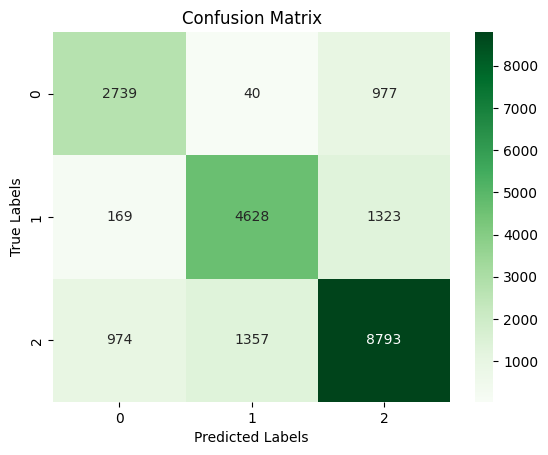


Evaluation for Decision Tree:
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.66      0.67      3756
           1       0.72      0.71      0.72      6120
           2       0.75      0.75      0.75     11124

    accuracy                           0.73     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.73      0.73      0.73     21000


---------------------------------------------



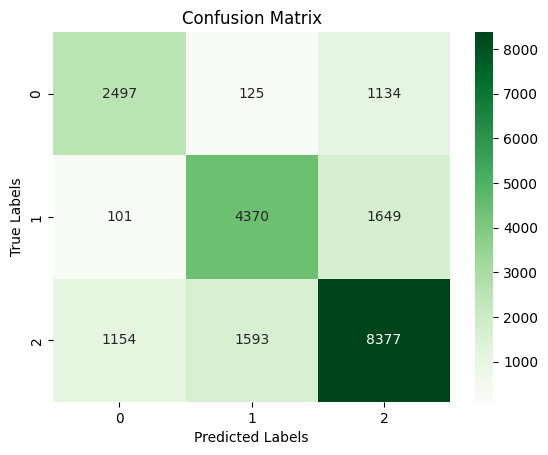


Evaluation for KNN:
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      3756
           1       0.73      0.73      0.73      6120
           2       0.78      0.76      0.77     11124

    accuracy                           0.74     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.74      0.74      0.74     21000


---------------------------------------------



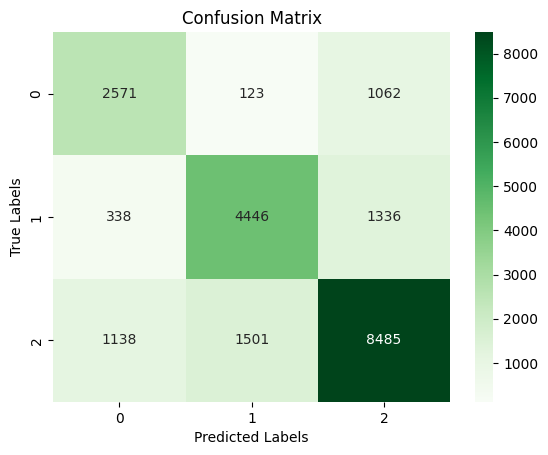


Evaluation for Gaussian NB:
Classification Report
              precision    recall  f1-score   support

           0       0.49      0.85      0.62      3756
           1       0.64      0.67      0.66      6120
           2       0.81      0.59      0.69     11124

    accuracy                           0.66     21000
   macro avg       0.65      0.70      0.65     21000
weighted avg       0.71      0.66      0.67     21000


---------------------------------------------



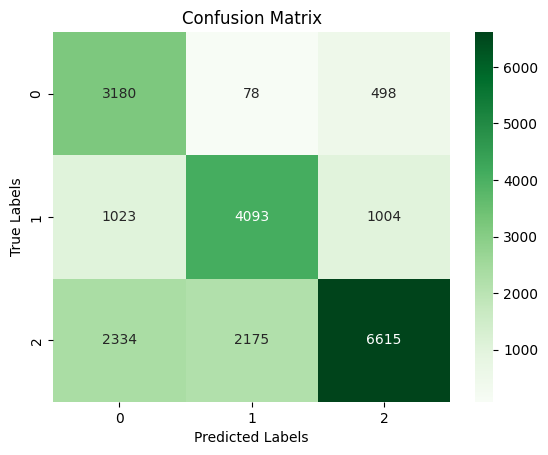

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2270
[LightGBM] [Info] Number of data points in the train set: 49000, number of used features: 19
[LightGBM] [Info] Start training from score -1.721054
[LightGBM] [Info] Start training from score -1.233030
[LightGBM] [Info] Start training from score -0.635418

Evaluation for Light GBM:
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      3756
           1       0.76      0.71      0.73      6120
           2       0.78      0.77      0.78     11124

    accuracy                           0.75     21000
   macro avg       0.73      0.74      0.73     21000
weighted avg       0.75      0.75      0.75     21000


---------------------------------------------



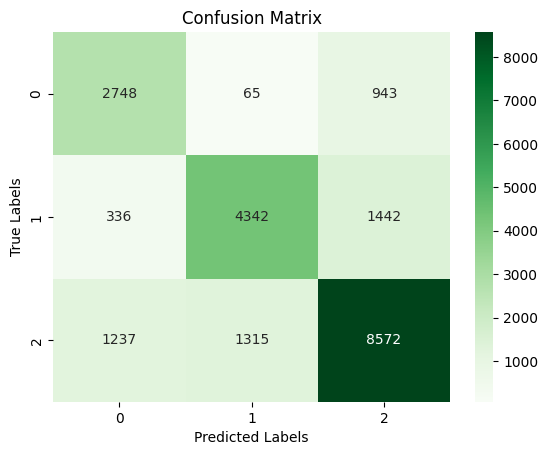

In [ ]:
# List of classifiers to test with basic parameters
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', xgb.XGBClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Gaussian NB', GaussianNB()),
    ('Light GBM', LGBMClassifier(random_state=42))
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Fit the model on the training data
    clf.fit(X_rf_train, Y_rf_train.values.ravel())  # Use ravel() to flatten the target variable

    # Predict on the test set
    Y_rf_pred = clf.predict(X_rf_test)

    # Evaluate the model
    evaluate_model(Y_rf_test, Y_rf_pred, clf_name)

## Using XGB Features


Evaluation for Random Forest:
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      3756
           1       0.77      0.80      0.79      6120
           2       0.80      0.79      0.80     11124

    accuracy                           0.78     21000
   macro avg       0.77      0.77      0.77     21000
weighted avg       0.78      0.78      0.78     21000


---------------------------------------------



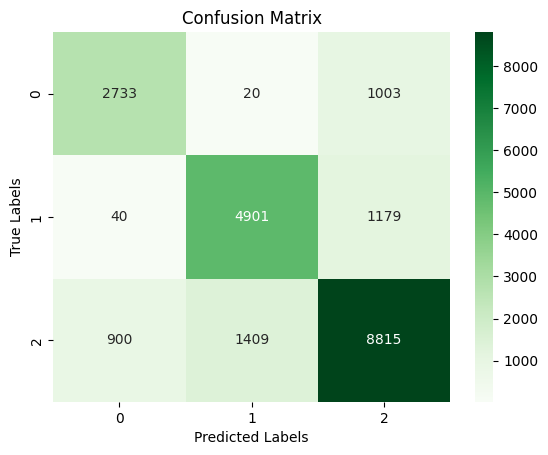


Evaluation for XGBoost:
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.73      0.71      3756
           1       0.77      0.76      0.76      6120
           2       0.80      0.79      0.79     11124

    accuracy                           0.77     21000
   macro avg       0.75      0.76      0.76     21000
weighted avg       0.77      0.77      0.77     21000


---------------------------------------------



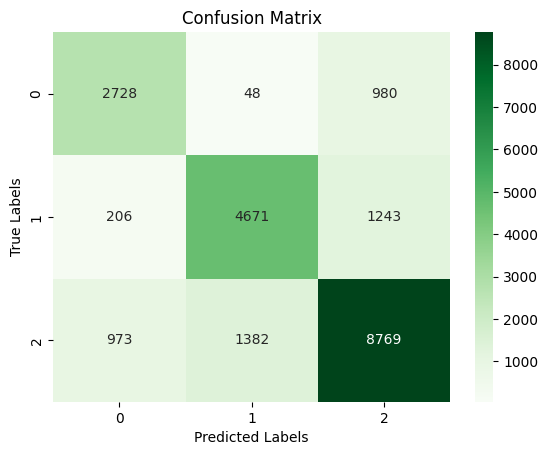


Evaluation for Decision Tree:
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.69      0.68      3756
           1       0.72      0.77      0.74      6120
           2       0.78      0.74      0.76     11124

    accuracy                           0.74     21000
   macro avg       0.72      0.73      0.73     21000
weighted avg       0.74      0.74      0.74     21000


---------------------------------------------



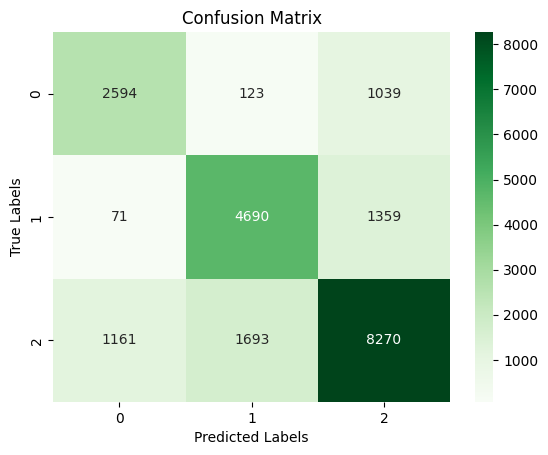


Evaluation for KNN:
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      3756
           1       0.75      0.77      0.76      6120
           2       0.80      0.77      0.78     11124

    accuracy                           0.76     21000
   macro avg       0.74      0.75      0.74     21000
weighted avg       0.76      0.76      0.76     21000


---------------------------------------------



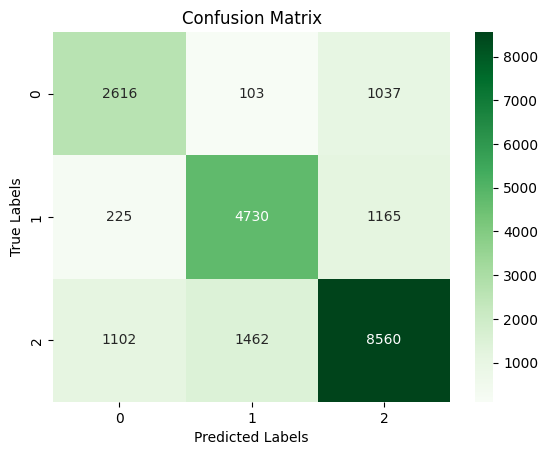


Evaluation for Gaussian NB:
Classification Report
              precision    recall  f1-score   support

           0       0.49      0.84      0.62      3756
           1       0.64      0.66      0.65      6120
           2       0.81      0.60      0.69     11124

    accuracy                           0.66     21000
   macro avg       0.65      0.70      0.65     21000
weighted avg       0.70      0.66      0.66     21000


---------------------------------------------



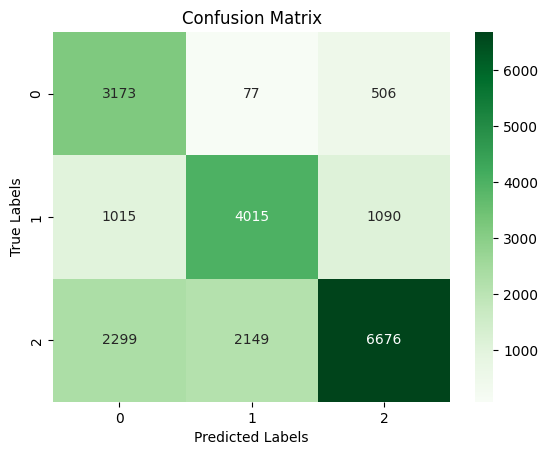

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1473
[LightGBM] [Info] Number of data points in the train set: 49000, number of used features: 19
[LightGBM] [Info] Start training from score -1.721054
[LightGBM] [Info] Start training from score -1.233030
[LightGBM] [Info] Start training from score -0.635418

Evaluation for Light GBM:
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.74      0.69      3756
           1       0.76      0.72      0.74      6120
           2       0.79      0.77      0.78     11124

    accuracy                           0.75     21000
   macro avg       0.73      0.74      0.74     21000
weighted avg       0.75      0

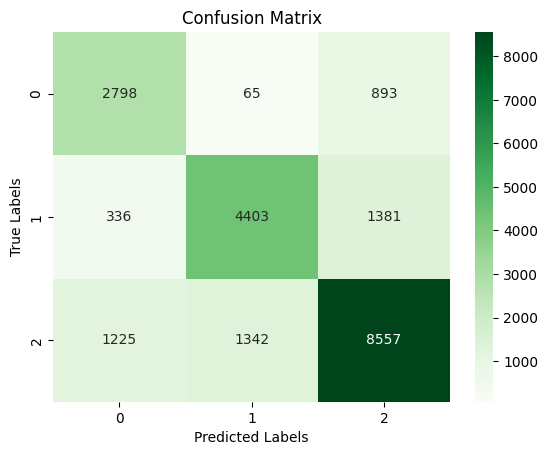

In [ ]:
# List of classifiers to test with basic parameters
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', xgb.XGBClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Gaussian NB', GaussianNB()),
    ('Light GBM', LGBMClassifier(random_state=42))
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Fit the model on the training data
    clf.fit(X_xgb_train, Y_xgb_train.values.ravel())  # Use ravel() to flatten the target variable

    # Predict on the test set
    Y_xgb_pred = clf.predict(X_xgb_test)

    # Evaluate the model
    evaluate_model(Y_xgb_test, Y_xgb_pred, clf_name)

### Using All Features


Evaluation for Random Forest:
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      3756
           1       0.79      0.82      0.80      6120
           2       0.82      0.81      0.81     11124

    accuracy                           0.80     21000
   macro avg       0.79      0.79      0.79     21000
weighted avg       0.80      0.80      0.80     21000


---------------------------------------------



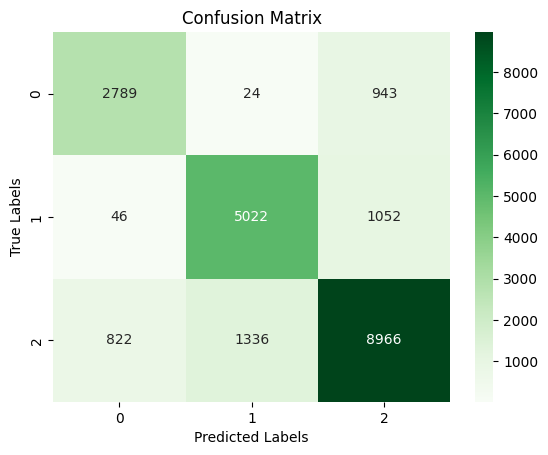


Evaluation for XGBoost:
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.73      0.72      3756
           1       0.77      0.76      0.76      6120
           2       0.80      0.79      0.79     11124

    accuracy                           0.77     21000
   macro avg       0.75      0.76      0.76     21000
weighted avg       0.77      0.77      0.77     21000


---------------------------------------------



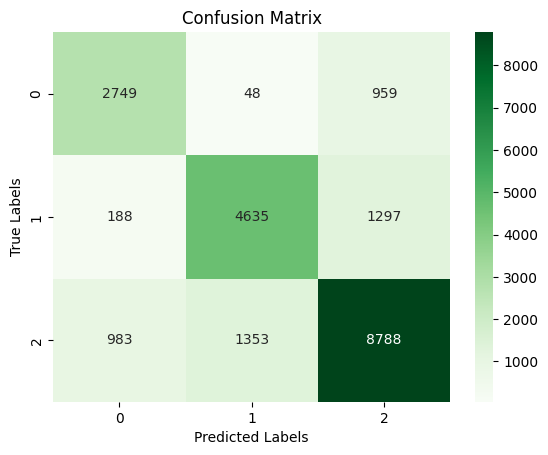


Evaluation for Decision Tree:
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.67      0.67      3756
           1       0.72      0.71      0.72      6120
           2       0.75      0.75      0.75     11124

    accuracy                           0.73     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.73      0.73      0.73     21000


---------------------------------------------



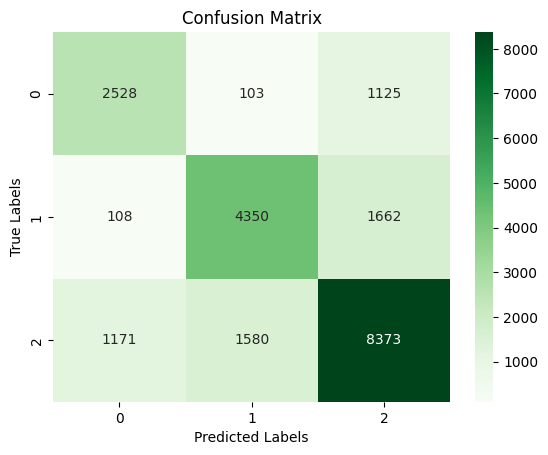


Evaluation for KNN:
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      3756
           1       0.76      0.77      0.76      6120
           2       0.79      0.77      0.78     11124

    accuracy                           0.76     21000
   macro avg       0.74      0.75      0.75     21000
weighted avg       0.76      0.76      0.76     21000


---------------------------------------------



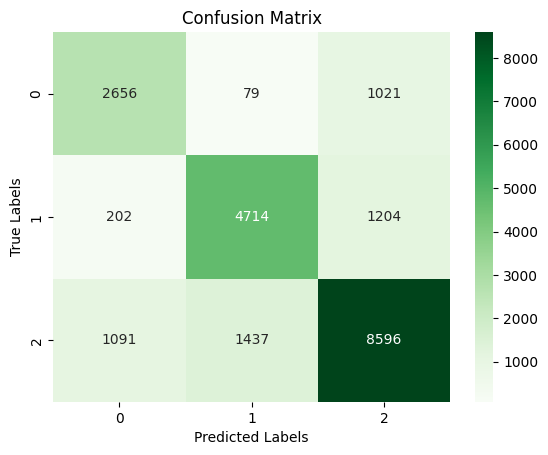


Evaluation for Gaussian NB:
Classification Report
              precision    recall  f1-score   support

           0       0.46      0.85      0.60      3756
           1       0.61      0.72      0.66      6120
           2       0.84      0.51      0.64     11124

    accuracy                           0.63     21000
   macro avg       0.64      0.70      0.63     21000
weighted avg       0.70      0.63      0.64     21000


---------------------------------------------



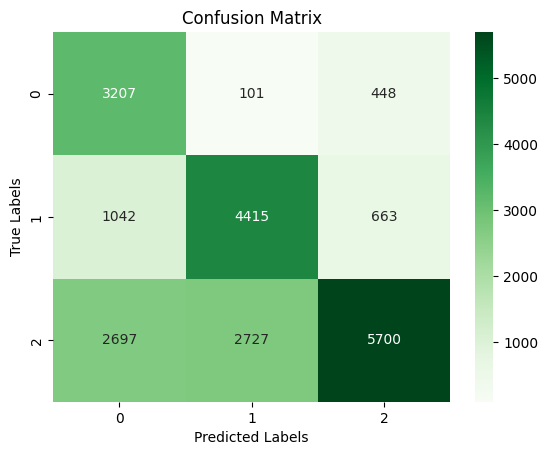

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 49000, number of used features: 54
[LightGBM] [Info] Start training from score -1.721054
[LightGBM] [Info] Start training from score -1.233030
[LightGBM] [Info] Start training from score -0.635418

Evaluation for Light GBM:
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.74      0.69      3756
           1       0.76      0.71      0.73      6120
           2       0.78      0.78      0.78     11124

    accuracy                           0.75     21000
   macro avg       0.73      0.74      0.74     21000
weighted avg       0.75      0

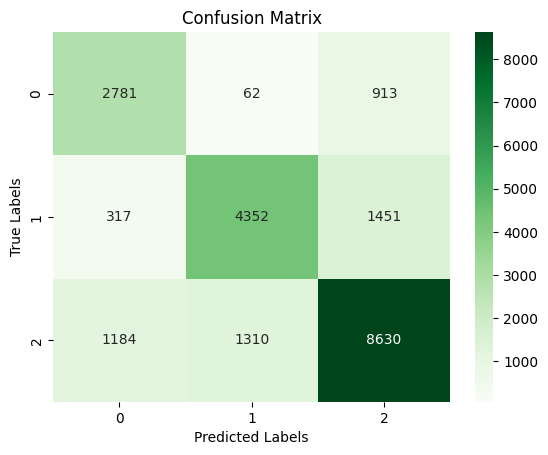

In [ ]:
# List of classifiers to test with basic parameters
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', xgb.XGBClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Gaussian NB', GaussianNB()),
    ('Light GBM', LGBMClassifier(random_state=42))
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Fit the model on the training data
    clf.fit(X_df_train, Y_df_train.values.ravel())  # Use ravel() to flatten the target variable

    # Predict on the test set
    Y_df_pred = clf.predict(X_df_test)

    # Evaluate the model
    evaluate_model(Y_df_test, Y_df_pred, clf_name)


## Result and Evaluation



### Random Forest Perfomed the best when tested with all three sets of features - RF Features, XGB Features and All Features with an accuracy of
### **Note** : We did test these model on the actual test data and RF performed the best. However, we are not adding the code for the testing done since its performed in following stages and it would increase the length of the file, here.  

# STAGE 2 - Best Random Forest Model + Evaluation

#### (Reading the data again, since starting from here, the code was done by another person with different value names.)

In [68]:
train_data = pd.read_csv('train_set.csv', index_col=0)
test_data = pd.read_csv('test_set.csv', index_col=0)

## Create new features

In [69]:
# create new features
# Create 'Debt_Income_Ratio' for train_data
train_data['Debt_Income_Ratio'] = train_data['Outstanding_Debt'] / train_data['Annual_Income']
test_data['Debt_Income_Ratio'] = test_data['Outstanding_Debt'] / test_data['Annual_Income']

# Create 'Income_Utilization_Interact' for both dataset
train_data['Income_Utilization_Interact'] = train_data['Annual_Income'] * train_data['Credit_Utilization_Ratio']
test_data['Income_Utilization_Interact'] = test_data['Annual_Income'] * test_data['Credit_Utilization_Ratio']

# Age Binning
bins = [0, 18, 30, 40, 50, 60, float('inf')]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']
train_data['Age_Category'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)
test_data['Age_Category'] = pd.cut(test_data['Age'], bins=bins, labels=labels, right=False)

# Payment-to-Income Ratio--not good, and has extreme outliers
# train_data['Payment_to_Income_Ratio'] = train_data['Total_EMI_per_month'] / train_data['Monthly_Inhand_Salary']
# test_data['Payment_to_Income_Ratio'] = test_data['Total_EMI_per_month'] / test_data['Monthly_Inhand_Salary']

# number of credit products
train_data['Num_Credit_Products'] = train_data['Num_Bank_Accounts'] + train_data['Num_Credit_Card'] + train_data['Num_of_Loan']
test_data['Num_Credit_Products'] = test_data['Num_Bank_Accounts'] + test_data['Num_Credit_Card'] + test_data['Num_of_Loan']

# ratio of delayed payments--not good
# train_data['Ratio_Delayed_Payments'] = train_data['Num_of_Delayed_Payment'] / train_data['Num_Credit_Products']
# test_data['Ratio_Delayed_Payments'] = test_data['Num_of_Delayed_Payment'] / test_data['Num_Credit_Products']

# average spending per transaction--not good
#train_data['Avg_Spending_Per_Transaction'] = train_data['Monthly_Balance'] / train_data['Num_Credit_Products']
#test_data['Avg_Spending_Per_Transaction'] = test_data['Monthly_Balance'] / test_data['Num_Credit_Products']

# number of transactions per month
train_data['Num_Transactions_Per_Month'] = train_data['Num_Credit_Products'] + train_data['Num_Credit_Inquiries']
test_data['Num_Transactions_Per_Month'] = test_data['Num_Credit_Products'] + test_data['Num_Credit_Inquiries']


# length of credit history
train_data['Credit_History_Length'] = train_data['Credit_History_Age'] + train_data['Delay_from_due_date']
test_data['Credit_History_Length'] = test_data['Credit_History_Age'] + test_data['Delay_from_due_date']

### Treatment of 'Type_Of_Loan' Column - Train and Test

In [70]:
# split type of loan column
def process_loan_types(df):
    # Split the 'Type_of_Loan' column into multiple columns
    loan_types = df['Type_of_Loan'].str.split(',').apply(lambda x: [s.strip() for s in x])

    # Create a DataFrame with loan types as columns and 1 if present, 0 if not
    loan_types_encoded = pd.get_dummies(loan_types.apply(pd.Series).stack()).sum(level=0)

    # Merge the one-hot encoded loan types back into the original DataFrame
    df = pd.concat([df, loan_types_encoded], axis=1)

    # Drop the original 'Type_of_Loan' column
    df = df.drop(['Type_of_Loan'], axis=1)

    return df

# Apply the function to both train_data and test_data
train_data_processed = process_loan_types(train_data.copy())
test_data_processed = process_loan_types(test_data.copy())

<ipython-input-70-8b51ee847b40>:7: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  loan_types_encoded = pd.get_dummies(loan_types.apply(pd.Series).stack()).sum(level=0)
<ipython-input-70-8b51ee847b40>:7: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  loan_types_encoded = pd.get_dummies(loan_types.apply(pd.Series).stack()).sum(level=0)


In [62]:
train_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 84094 to 29219
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Customer_ID                  70000 non-null  int64   
 1   Month                        70000 non-null  int64   
 2   Name                         70000 non-null  object  
 3   Age                          70000 non-null  float64 
 4   SSN                          70000 non-null  float64 
 5   Occupation                   70000 non-null  object  
 6   Annual_Income                70000 non-null  float64 
 7   Monthly_Inhand_Salary        70000 non-null  float64 
 8   Num_Bank_Accounts            70000 non-null  float64 
 9   Num_Credit_Card              70000 non-null  float64 
 10  Interest_Rate                70000 non-null  float64 
 11  Num_of_Loan                  70000 non-null  float64 
 12  Delay_from_due_date          70000 non-null  float64 
 1

## Selecting Features and Encoding

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

### drop irerelevant columns

In [75]:
# Drop irrelevant columns from train_data
train_data = train_data_processed.drop(['Customer_ID','Name', 'SSN'], axis=1)

# Drop irrelevant columns from test_data
test_data = test_data_processed.drop(['Customer_ID','Name', 'SSN'], axis=1)

# Define numerical and categorical columns
# Updated numerical columns
numerical_columns = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
                     'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                     'Num_Credit_Inquiries', 'Annual_Income', 'Monthly_Inhand_Salary',
                     'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
                     'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
                     'Debt_Income_Ratio', 'Income_Utilization_Interact',
                      'Num_Credit_Products', 'Num_Transactions_Per_Month', 'Credit_History_Length']

# Updated categorical columns
categorical_columns = ['Occupation', 'Month','Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',
                        'auto loan', 'credit-builder loan', 'debt consolidation loan',
                        'home equity loan', 'mortgage loan', 'not specified', 'payday loan',
                        'personal loan', 'student loan', 'Age_Category']


label_to_predict = 'Credit_Score'


### updated encoding(ordinal/Onehot) and RobustScale after new feature creation

In [76]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify unique values in specific columns for ordinal encoding
unique_credit_mix = train_data['Credit_Mix'].unique()
unique_payment_min_amount = train_data['Payment_of_Min_Amount'].unique()
unique_payment_behaviour = train_data['Payment_Behaviour'].unique()
unique_occupation = train_data['Occupation'].unique()
unique_age_category = train_data['Age_Category'].unique()
unique_month_category = train_data['Month'].unique()

numerical_columns = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
                     'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                     'Num_Credit_Inquiries', 'Annual_Income', 'Monthly_Inhand_Salary',
                     'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
                     'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
                     'Debt_Income_Ratio', 'Income_Utilization_Interact',
                      'Num_Credit_Products', 'Num_Transactions_Per_Month', 'Credit_History_Length']

categorical_columns = ['Occupation', 'Month','Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',
                        'auto loan', 'credit-builder loan', 'debt consolidation loan',
                        'home equity loan', 'mortgage loan', 'not specified', 'payday loan',
                        'personal loan', 'student loan', 'Age_Category']

# Define the ordinal transformer (ordinal encoding) for specific columns
ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Create a column transformer to apply transformers to different subsets of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_columns),
        ('ord', ordinal_transformer, ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Occupation', 'Age_Category','Month']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), [col for col in categorical_columns if col not in ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Occupation', 'Age_Category']])
    ])

# Fit and transform the training data
X_train = preprocessor.fit_transform(train_data)

unique_credit_mix_train = train_data['Credit_Mix'].unique()
unique_payment_min_amount_train = train_data['Payment_of_Min_Amount'].unique()
unique_payment_behaviour_train = train_data['Payment_Behaviour'].unique()
unique_occupation_train = train_data['Occupation'].unique()
unique_age_category_train = train_data['Age_Category'].unique()
unique_month_category_train = train_data['Month'].unique()

# Ensure consistency in unique values between fit and transform for ordinal encoding
ordinal_transformer.categories_ = [unique_credit_mix_train, unique_payment_min_amount_train, unique_payment_behaviour_train, unique_occupation_train, unique_age_category, unique_month_category_train]

# Transform the testing data using the fitted preprocessor
X_test = preprocessor.transform(test_data)

In [74]:
X_train.shape

(70000, 86)

### Check if there's outlier after preprocessing

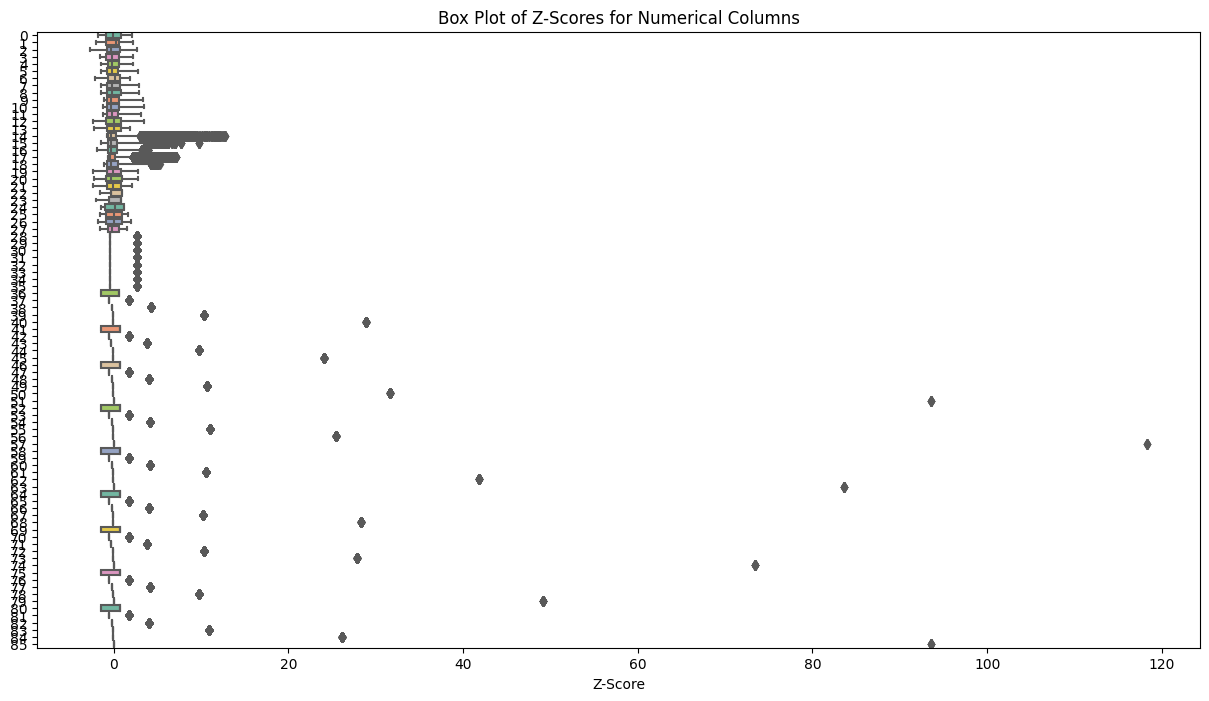

Columns with outliers:
Index(['num__Annual_Income', 'num__Monthly_Inhand_Salary',
       'num__Outstanding_Debt', 'num__Credit_Utilization_Ratio',
       'num__Total_EMI_per_month', 'num__Amount_invested_monthly',
       'num__Monthly_Balance', 'num__Debt_Income_Ratio',
       'num__Income_Utilization_Interact', 'cat__auto loan_2',
       'cat__auto loan_3', 'cat__auto loan_4', 'cat__credit-builder loan_2',
       'cat__credit-builder loan_3', 'cat__credit-builder loan_4',
       'cat__debt consolidation loan_2', 'cat__debt consolidation loan_3',
       'cat__debt consolidation loan_4', 'cat__debt consolidation loan_5',
       'cat__home equity loan_2', 'cat__home equity loan_3',
       'cat__home equity loan_4', 'cat__home equity loan_5',
       'cat__mortgage loan_2', 'cat__mortgage loan_3', 'cat__mortgage loan_4',
       'cat__mortgage loan_5', 'cat__not specified_2', 'cat__not specified_3',
       'cat__not specified_4', 'cat__payday loan_2', 'cat__payday loan_3',
       'cat__payd

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate z-scores for the numerical columns
z_scores = ((X_train - X_train.mean(axis=0)) / X_train.std(axis=0))

# Set a threshold for identifying outliers (e.g., z_score_threshold = 3)
z_score_threshold = 3

# Identify outliers based on the threshold
outliers = (z_scores > z_score_threshold) | (z_scores < -z_score_threshold)

# Create a box plot for each numerical column with outliers highlighted
plt.figure(figsize=(15, 8))
sns.boxplot(data=z_scores, orient="h", palette="Set2", whis=z_score_threshold)
plt.title('Box Plot of Z-Scores for Numerical Columns')
plt.xlabel('Z-Score')
plt.show()

# Identify and print columns with outliers
outlier_columns = X_train_df.columns[outliers.any(axis=0)]
print("Columns with outliers:")
print(outlier_columns)


### (CHOSEN METHOD)Dealing with outliers/Skewness-log transformation

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
import numpy as np

# Identify unique values in specific columns for ordinal encoding
unique_credit_mix = train_data['Credit_Mix'].unique()
unique_payment_min_amount = train_data['Payment_of_Min_Amount'].unique()
unique_payment_behaviour = train_data['Payment_Behaviour'].unique()
unique_occupation = train_data['Occupation'].unique()
unique_age_category = train_data['Age_Category'].unique()

# Define a function for log transformation
def log_transform(data):
    return np.log1p(data)

# Create a column transformer to apply transformers to different subsets of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in numerical_columns if col not in ['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Debt_Income_Ratio', 'Income_Utilization_Interact']]),
        ('num_log', FunctionTransformer(log_transform), ['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Debt_Income_Ratio', 'Income_Utilization_Interact']),
        ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Occupation', 'Age_Category']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), [col for col in categorical_columns if col not in ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Occupation', 'Age_Category']])
    ])

# Fit and transform the training data
X_train = preprocessor.fit_transform(train_data)

# Ensure consistency in unique values between fit and transform for ordinal encoding
ordinal_transformer.categories_ = [unique_credit_mix, unique_payment_min_amount, unique_payment_behaviour, unique_occupation, unique_age_category]

# Transform the testing data using the fitted preprocessor
X_test = preprocessor.transform(test_data)


In [79]:
# Encoding target variables
# Use LabelEncoder for multi-class encoding
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data[label_to_predict])


### (BEST SCORE)Best_model based on Bayesian Search

In [80]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
# Assuming X_train, y_train are your feature matrix and target variable
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Random Forest Model with the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Use SelectFromModel to select features based on feature importances
sfm = SelectFromModel(best_rf_model, threshold='median')
sfm.fit(X_train_resampled, y_train_resampled)

# Transform your data to include only selected features
X_train_selected = sfm.transform(X_train_resampled)
X_val_selected = sfm.transform(X_val)  # Ensure you transform X_val with the same selected features

# Train Random Forest on the selected features
best_rf_model.fit(X_train_selected, y_train_resampled)

RandomForestClassifier(max_depth=30, n_estimators=300, random_state=42)

In [81]:
# Predict and evaluate on the validation set
y_val_rf_pred = best_rf_model.predict(X_val_selected)
accuracy_rf = accuracy_score(y_val, y_val_rf_pred)
print(f"Random Forest Validation Accuracy: {accuracy_rf}")

Random Forest Validation Accuracy: 0.8175714285714286


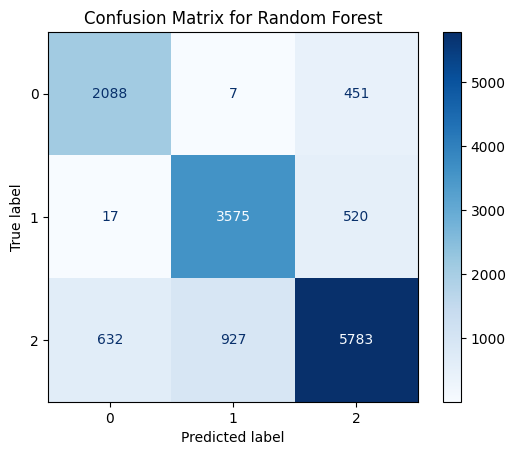

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming best_rf_model is your trained RandomForestClassifier
# and X_val_selected, y_val are your validation set with selected features
y_val_rf_pred = best_rf_model.predict(X_val_selected)

# Calculate confusion matrix
cm = confusion_matrix(y_val, y_val_rf_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for Random Forest')
plt.show()



In [88]:
print(classification_report(y_val, y_val_rf_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      2546
           1       0.79      0.87      0.83      4112
           2       0.86      0.79      0.82      7342

    accuracy                           0.82     14000
   macro avg       0.80      0.83      0.81     14000
weighted avg       0.82      0.82      0.82     14000



In [82]:
X_test_selected = sfm.transform(X_test)

# STAGE 3 - Other Techniques We Tried
##(but eventually not working)

### (NOTE CHOSEN)SMOTE

In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are your feature and target variables
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Check the class distribution before resampling
print("Class distribution before resampling:")
print(pd.Series(y_train).value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("\nClass distribution after resampling:")
print(pd.Series(y_train_resampled).value_counts())


Class distribution before resampling:
2    29738
1    16287
0     9975
dtype: int64

Class distribution after resampling:
0    29738
1    29738
2    29738
dtype: int64


## Random Forest

### Baseline model-untouched

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have already defined X_train, X_val, y_train, y_val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train Random Forest
rf_model.fit(X_train, y_train)

# Predict and evaluate on the validation set
y_val_rf_pred = rf_model.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_val_rf_pred)
print(f"Random Forest Validation Accuracy: {accuracy_rf}")


Random Forest Validation Accuracy: 0.8025


### Baseline RF and Oversample (from now on all applied RandomOverSampler)

In [ ]:
# baseline-model--oversample but hasn't address overfitting
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train are your feature matrix and target variable
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Random Forest Model
#rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Random Forest
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate on the validation set
y_val_rf_pred = rf_model.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_val_rf_pred)
print(f"Random Forest Validation Accuracy: {accuracy_rf}")


Random Forest Validation Accuracy: 0.8088571428571428


### (NOT CHOSEN)Dealing outliers--removing--0.81142

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
import numpy as np

# Identify unique values in specific columns for ordinal encoding
unique_credit_mix = train_data['Credit_Mix'].unique()
unique_payment_min_amount = train_data['Payment_of_Min_Amount'].unique()
unique_payment_behaviour = train_data['Payment_Behaviour'].unique()
unique_occupation = train_data['Occupation'].unique()
unique_age_category = train_data['Age_Category'].unique()

# Define a function to remove outliers
def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(data, lower_bound, upper_bound)

# Create a column transformer to apply transformers to different subsets of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('num_no_outliers', FunctionTransformer(remove_outliers), ['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Debt_Income_Ratio', 'Income_Utilization_Interact', 'Payment_to_Income_Ratio']),
        ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Occupation', 'Age_Category']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), [col for col in categorical_columns if col not in ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Occupation', 'Age_Category']])
    ])

# Fit and transform the training data
X_train = preprocessor.fit_transform(train_data)

# Ensure consistency in unique values between fit and transform for ordinal encoding
ordinal_transformer.categories_ = [unique_credit_mix, unique_payment_min_amount, unique_payment_behaviour, unique_occupation, unique_age_category]

# Transform the testing data using the fitted preprocessor
X_test = preprocessor.transform(test_data)

### (CHOSEN METHOD)the model above with feature selection1(selectfrommodel)

In [ ]:
# baseline-model--oversample but hasn't address overfitting
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Assuming X_train, y_train are your feature matrix and target variable
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Random Forest Model
#rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Use SelectFromModel to select features based on feature importances
sfm = SelectFromModel(rf_model, threshold='median')
sfm.fit(X_train_resampled, y_train_resampled)

# Transform your data to include only selected features
X_train_selected = sfm.transform(X_train_resampled)
X_val_selected = sfm.transform(X_val)  # Ensure you transform X_val with the same selected features

# Train Random Forest on the selected features
rf_model.fit(X_train_selected, y_train_resampled)

# Predict and evaluate on the validation set
y_val_rf_pred = rf_model.predict(X_val_selected)
accuracy_rf = accuracy_score(y_val, y_val_rf_pred)
print(f"Random Forest Validation Accuracy: {accuracy_rf}")

Random Forest Validation Accuracy: 0.8089285714285714


### (NOT CHOSEN)the model above but with feature selection2(RFE)--time consumming, to be tried

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV

# Assuming X_train, y_train are your feature matrix and target variable
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create an RFECV instance
rfecv = RFECV(estimator=rf_model, step=1, cv=5, scoring='accuracy')

# Fit the RFECV to the resampled training data
rfecv.fit(X_train_resampled, y_train_resampled)

# Transform your data to include only selected features
X_train_selected = rfecv.transform(X_train_resampled)
X_val_selected = rfecv.transform(X_val)  # Ensure you transform X_val with the same selected features

# Train Random Forest on the selected features
rf_model.fit(X_train_selected, y_train_resampled)

# Predict and evaluate on the validation set
y_val_rf_pred = rf_model.predict(X_val_selected)
accuracy_rf = accuracy_score(y_val, y_val_rf_pred)
print(f"Random Forest Validation Accuracy: {accuracy_rf}")


KeyboardInterrupt: ignored

### Adding polynomial features--worse

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Assuming X_train, y_train are your feature matrix and target variable
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Random Forest Model with Polynomial Features
rf_model = make_pipeline(
    PolynomialFeatures(degree=2),
    RandomForestClassifier(n_estimators=100, random_state=42)
)

# Fit the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Use SelectFromModel to select features based on feature importances
sfm = SelectFromModel(rf_model.named_steps['randomforestclassifier'], threshold='median')
sfm.fit(X_train_resampled, y_train_resampled)

# Transform your data to include only selected features
X_train_selected = sfm.transform(X_train_resampled)
X_val_selected = sfm.transform(X_val)  # Ensure you transform X_val with the same selected features

# Train Random Forest on the selected features
rf_model.fit(X_train_selected, y_train_resampled)

# Predict and evaluate on the validation set
y_val_rf_pred = rf_model.predict(X_val_selected)
accuracy_rf = accuracy_score(y_val, y_val_rf_pred)
print(f"Random Forest Validation Accuracy with Polynomial Features: {accuracy_rf}")


Random Forest Validation Accuracy with Polynomial Features: 0.8074285714285714


### Grid search

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Assuming X_train, y_train are your feature matrix and target variable
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

# Use SelectFromModel to select features based on feature importances
sfm = SelectFromModel(rf_model, threshold='median')
sfm.fit(X_train_resampled, y_train_resampled)

# Transform your data to include only selected features
X_train_selected = sfm.transform(X_train_resampled)
X_val_selected = sfm.transform(X_val)  # Ensure you transform X_val with the same selected features

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train_selected, y_train_resampled)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Predict and evaluate on the validation set
y_val_rf_pred = best_rf_model.predict(X_val_selected)
accuracy_rf = accuracy_score(y_val, y_val_rf_pred)
print(f"Random Forest Validation Accuracy: {accuracy_rf}")
print("Best Hyperparameters:", grid_search.best_params_)



Random Forest Validation Accuracy: 0.8097142857142857
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### Tried to solve overfitting with Early Stopping

In [ ]:
# Assuming X_train, y_train are your feature matrix and target variable
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Random Forest Model with the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1  # Utilize all available cores for faster training
)

# Use SelectFromModel to select features based on feature importances
sfm = SelectFromModel(best_rf_model, threshold='median')
sfm.fit(X_train_resampled, y_train_resampled)

# Transform your data to include only selected features
X_train_selected = sfm.transform(X_train_resampled)
X_val_selected = sfm.transform(X_val)  # Ensure you transform X_val with the same selected features

# Train Random Forest on the selected features with early stopping
best_accuracy = 0
best_n_estimators = 0

for n_estimators in range(10, 300, 10):
    best_rf_model.set_params(n_estimators=n_estimators)
    best_rf_model.fit(X_train_selected, y_train_resampled)

    # Evaluate on validation set
    y_pred = best_rf_model.predict(X_val_selected)
    accuracy = accuracy_score(y_val, y_pred)

    print(f"Number of Trees: {n_estimators}, Accuracy: {accuracy}")

    # Check for improvement in accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators
    else:
        # Stop training if accuracy does not improve for a certain number of rounds (early stopping)
        break

print(f"Best Number of Trees: {best_n_estimators}, Best Accuracy: {best_accuracy}")

## Hyper parameter tuning by Searching

### Best hyperparameter from last grid search--0.81457


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
# Assuming X_train, y_train are your feature matrix and target variable
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Random Forest Model with the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Use SelectFromModel to select features based on feature importances
sfm = SelectFromModel(best_rf_model, threshold='median')
sfm.fit(X_train_resampled, y_train_resampled)

# Transform your data to include only selected features
X_train_selected = sfm.transform(X_train_resampled)
X_val_selected = sfm.transform(X_val)  # Ensure you transform X_val with the same selected features

# Train Random Forest on the selected features
best_rf_model.fit(X_train_selected, y_train_resampled)

RandomForestClassifier(n_estimators=200, random_state=42)

### Another Grid Search

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Assuming X_train, y_train are your feature matrix and target variable
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best parameters to train the final model
best_rf_model = RandomForestClassifier(random_state=42, **best_params)

# Use SelectFromModel to select features based on feature importances
sfm = SelectFromModel(best_rf_model, threshold='median')
sfm.fit(X_train_resampled, y_train_resampled)

# Transform your data to include only selected features
X_train_selected = sfm.transform(X_train_resampled)
X_val_selected = sfm.transform(X_val)  # Ensure you transform X_val with the same selected features

# Train Random Forest on the selected features
best_rf_model.fit(X_train_selected, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
#Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

### Bayesian Search

In [ ]:
pip install imbalanced-learn scikit-learn scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.6 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Assuming X_train, y_train are your feature matrix and target variable
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Define the parameter search space for BayesSearchCV
param_dist = {
    'n_estimators': (100, 300),
    'max_depth': (1, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4),
}

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

# Create the BayesSearchCV object
bayes_search = BayesSearchCV(estimator=rf_model, search_spaces=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the BayesSearchCV to the data
bayes_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = bayes_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best parameters to train the final model
best_rf_model = RandomForestClassifier(random_state=42, **best_params)

# Use SelectFromModel to select features based on feature importances
sfm = SelectFromModel(best_rf_model, threshold='median')
sfm.fit(X_train_resampled, y_train_resampled)

# Transform your data to include only selected features
X_train_selected = sfm.transform(X_train_resampled)
X_val_selected = sfm.transform(X_val)  # Ensure you transform X_val with the same selected features

# Train Random Forest on the selected features
best_rf_model.fit(X_train_selected, y_train_resampled)


ModuleNotFoundError: ignored

In [ ]:
#based on Bayes Search
#Best Hyperparameters: OrderedDict([('max_depth', 30), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 300)])

# Stage 4 Alternative (Ensemble method / Neural Networks)

## 1 Ensemble Method

#### Stacking with baseline

In [91]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Assuming X_train, y_train are your feature matrix and target variable
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Use SelectFromModel to select features based on feature importances
sfm = SelectFromModel(rf_model, threshold='median')
sfm.fit(X_train_resampled, y_train_resampled)

# Transform your data to include only selected features
X_train_selected = sfm.transform(X_train_resampled)
X_val_selected = sfm.transform(X_val)  # Ensure you transform X_val with the same selected features

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)

# Create a stacking classifier with Random Forest and Gradient Boosting as base models
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('gb', gb_model)],
    final_estimator=LogisticRegression(),
    stack_method='auto',
)

# Fit the stacking model on the training data
stacking_model.fit(X_train_selected, y_train_resampled)

# Predict and evaluate on the validation set
y_val_stacking_pred = stacking_model.predict(X_val_selected)
accuracy_stacking = accuracy_score(y_val, y_val_stacking_pred)
print(f"Stacking Model Validation Accuracy: {accuracy_stacking}")

KeyboardInterrupt: ignored

#### AdaBoosting with baseline

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Assuming X_train, y_train are your feature matrix and target variable
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Use SelectFromModel to select features based on feature importances
sfm = SelectFromModel(rf_model, threshold='median')
sfm.fit(X_train_resampled, y_train_resampled)

# Transform your data to include only selected features
X_train_selected = sfm.transform(X_train_resampled)
X_val_selected = sfm.transform(X_val)  # Ensure you transform X_val with the same selected features

# Train an AdaBoost model on top of Random Forest
adaboost_model = AdaBoostClassifier(base_estimator=rf_model, n_estimators=50, random_state=42)

# Fit the AdaBoost model on the training data
adaboost_model.fit(X_train_selected, y_train_resampled)

# Predict and evaluate on the validation set
y_val_adaboost_pred = adaboost_model.predict(X_val_selected)
accuracy_adaboost = accuracy_score(y_val, y_val_adaboost_pred)
print(f"AdaBoost Model Validation Accuracy: {accuracy_adaboost}")

#### XGBoost

In [90]:
from xgboost import XGBClassifier

# Assuming X_train, y_train are your feature matrix and target variable
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# XGBoost Model with the best hyperparameters
best_xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=30,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=1.0,
    random_state=42
)

# Use SelectFromModel to select features based on feature importances
sfm = SelectFromModel(best_xgb_model, threshold='median')
sfm.fit(X_train_resampled, y_train_resampled)

# Transform your data to include only selected features
X_train_selected = sfm.transform(X_train_resampled)
X_val_selected = sfm.transform(X_val)  # Ensure you transform X_val with the same selected features

# Train XGBoost on the selected features
best_xgb_model.fit(X_train_selected, y_train_resampled)

# Predict and evaluate on the validation set
y_val_xgb_pred = best_xgb_model.predict(X_val_selected)
accuracy_xgb = accuracy_score(y_val, y_val_xgb_pred)
print(f"XGBoost Validation Accuracy: {accuracy_xgb}")

KeyboardInterrupt: ignored

## 2 Neural Networks

#### Baseline

In [ ]:
#baseline model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint


# Number of classes
num_classes = len(label_encoder.classes_)

# Update the output layer for multi-class classification
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # 'softmax' for multi-class
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Use the same preprocessor for test data
X_test = preprocessor.transform(test_data)
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the validation set
y_val_pred_probs = model.predict(X_val)

# Convert predicted probabilities to class labels
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")

### (NOT APPLYING) Dealing with overfitting by early stopping--lower score (Testing different optimizer and learning rate)

In [ ]:
# Number of classes
num_classes = len(label_encoder.classes_)

#hyperparameter tuning 1--changing hidden layers/neurons per layers/'activation': ['relu', 'tanh', 'sigmoid']

# Update the output layer for multi-class classification
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

#hyperparameter tuning 2--changing optimizer/learning rate

#different opitmizer and learning rate
#model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #0.6968
#model.compile(optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #0.6955
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #0.70844
#model.compile(optimizer = keras.optimizers.Adagrad(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #0.6869
#model.compile(optimizer = keras.optimizers.Adadelta(learning_rate=1.0), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #0.6836
#model.compile(optimizer = keras.optimizers.Nadam(learning_rate=0.002), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #0.7009


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Use the same preprocessor for test data
X_test = preprocessor.transform(test_data)

#hyperparameter tuning 3--changing batch size/epochs/adding early_stopping to prevent overfitting
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
#model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the validation set
y_val_pred_probs = model.predict(X_val)

# Convert predicted probabilities to class labels
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")

In [ ]:
# exploring oversampling problem--part_1
# Import necessary libraries
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Assuming X_train, y_train are your feature matrix and target variable
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Check the class distribution before resampling
print("Class distribution before resampling:")
print(pd.Series(y_train).value_counts())

# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("\nClass distribution after resampling:")
print(pd.Series(y_train_resampled).value_counts())

# oversampling--part_2

# Number of classes
num_classes = len(label_encoder.classes_)

# Update the output layer for multi-class classification
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])



#different opitmizer and learning rate
#model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #0.6968
#model.compile(optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #0.6955
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #0.70844
#model.compile(optimizer = keras.optimizers.Adagrad(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #0.6869
#model.compile(optimizer = keras.optimizers.Adadelta(learning_rate=1.0), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #0.6836
#model.compile(optimizer = keras.optimizers.Nadam(learning_rate=0.002), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #0.7009


# Use the same preprocessor for test data
X_test_resampled = preprocessor.transform(test_data)


# Train the model on the resampled data
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
#model.fit(X_train_resampled, y_train_resampled, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_val, y_val)) #74


# Predict on the validation set
y_val_pred_probs = model.predict(X_val)

# Convert predicted probabilities to class labels
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")

## Stage 5-Generating the Submission

In [83]:
def generate_submission(model, preprocessor, test_data, label_encoder, model_type):
    # Use the same preprocessor for test data
    X_test = preprocessor.transform(test_data)

    if model_type == 'random_forest':
        # Predictions for Random Forest model
        predictions = best_rf_model.predict(X_test_selected)
    elif model_type == 'neural_network':
        # Predictions for Neural Network model
        predictions_probs = model.predict(X_test)
        predictions = np.argmax(predictions_probs, axis=1)
    else:
        raise ValueError("Invalid model_type. Supported values are 'random_forest' or 'neural_network'.")

    # Convert predicted labels to original class labels
    predicted_labels = label_encoder.inverse_transform(predictions)

    # Create a DataFrame for submission
    submission_df = pd.DataFrame({'Credit_Score': predicted_labels}, index=test_data.index)

    # Save the submission to a CSV file
    submission_df.to_csv(f'{model_type}_submission.csv')

# Example usage for Random Forest model
generate_submission(best_rf_model, preprocessor, test_data, label_encoder, model_type='random_forest')